<a href="https://colab.research.google.com/github/Achin120/Hotel-Booking-Analysis-/blob/main/Achin_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# ***`Importing necessary libraries`***

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***`Loading the Hotel Bookings.csv kept in the Drive`***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_booking_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/cohort hudson/Achin -Hotel Booking Analysis capstone project/Hotel Bookings.csv')

# ***1. Reading and Inspection***

In [4]:
# view the top five row of the file
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# view last five row.
hotel_booking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# let's look at the statistical aspects of the dataframes
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# information of dataframe
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#shape of dateFrame
hotel_booking_df.shape

(119390, 32)

In [9]:
# find null values
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# counting the hotel wise no. of rows.
hotel_booking_df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [11]:
#zchecking the different columns.
list(hotel_booking_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

<function matplotlib.pyplot.show>

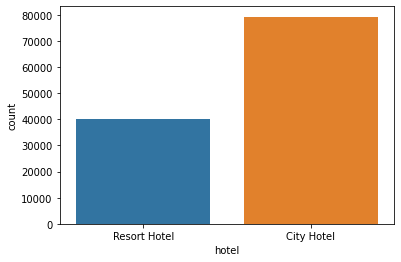

In [12]:
# Checkout the number of Booking in various type of Hotel
sns.countplot(x='hotel',data=hotel_booking_df)
plt.show

In [13]:
# making a copy of original dataframe 
hotel_booking_new= hotel_booking_df.copy()

# **2. Cleaning the Data**
```



In [14]:
#Checking the missing values in the columns
hotel_booking_new.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
#Column-wise null percentage

print(round(100*(hotel_booking_new.isnull().sum()/len(hotel_booking_new.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [16]:
# replacing NaN value for children column with 0 
hotel_booking_new['children']=hotel_booking_new['children'].fillna(0)

In [17]:
#  adding children and babies in one column
hotel_booking_new['Kids']=(hotel_booking_new['children']+hotel_booking_new['babies']).astype(int)

In [18]:
# droping the column babies and children as we have added and made new column as kids
# droping company and agent column as they have maximum numbers of NaN values
hotel_booking_new.drop(['babies','children','company','agent'],axis=1,inplace=True)

In [19]:
# droping the rows in which there are NaN values in country column
country_Nan=hotel_booking_new[hotel_booking_new['country'].isna()]
hotel_booking_new.drop(country_Nan.index,inplace=True)

In [20]:
#Checking the missing values in the columns
hotel_booking_new.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

# **3. Exploratory Data Analysis (EDA)  and Visualization**

## **Q:1 From where the most guests are coming ?**



In [21]:
hotel_booking_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [22]:
list(hotel_booking_new.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'Kids']

In [23]:
#Analyze  From where the most guests are coming.
country_wise_guests = hotel_booking_new[hotel_booking_new['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guest']
country_wise_guests

,country,No of guest
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


### ***People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.***

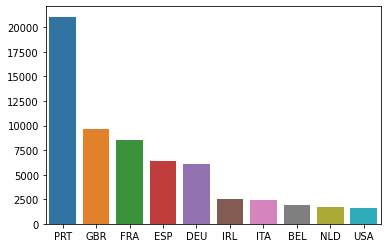

In [25]:
#plotting the graph to visualize  From where the most guests are coming.
sns.barplot(y=list(hotel_booking_new[hotel_booking_new['is_canceled'] == 0]['country'].value_counts().head(10)),x=list(hotel_booking_new[hotel_booking_new['is_canceled'] == 0]['country'].value_counts().head(10).index))

## **Q:2 Visualizing Hotel wise yearly bookings?**

In [26]:
hotel_booking_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [27]:
hotel_booking_new.groupby('hotel')['arrival_date_year'].value_counts()

hotel         arrival_date_year
City Hotel    2016                 38135
              2017                 27504
              2015                 13667
Resort Hotel  2016                 18300
              2017                 13100
              2015                  8196
Name: arrival_date_year, dtype: int64

In [28]:
# % wise Yearly bookings.
hotel_booking_new.arrival_date_year.value_counts(normalize=True)


2016    0.474635
2017    0.341491
2015    0.183874
Name: arrival_date_year, dtype: float64

**47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise**

Text(0.5, 1.0, 'Yearly bookings')

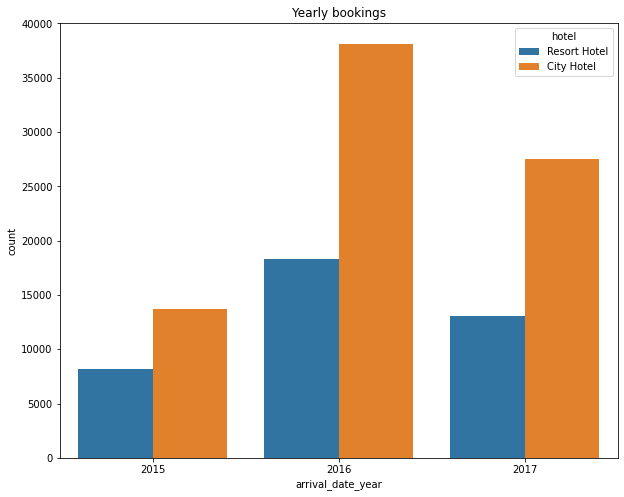

In [29]:
# ploting a bargraph for yearly bookings of city and resort hotels
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='arrival_date_year',data=hotel_booking_new,hue='hotel').set_title('Yearly bookings')

## ***Inference: Bookings across years is higher for city hotel compared to resort hotel and donot increase proportionately over the years.***

In [30]:
hotel_booking_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids'],
      dtype='object')

## ***Q:3 Which meal is mostly ordered ?***

In [31]:
hotel_booking_new[['meal','hotel']].head(5)

,meal,hotel
0,BB,Resort Hotel
1,BB,Resort Hotel
2,BB,Resort Hotel
3,BB,Resort Hotel
4,BB,Resort Hotel


In [32]:
hotel_booking_new[['meal','hotel']].tail(5)

,meal,hotel
119385,BB,City Hotel
119386,BB,City Hotel
119387,BB,City Hotel
119388,BB,City Hotel
119389,HB,City Hotel


In [33]:
# Analysis the mostly ordered meal by customer in the hotel.
most_ordered_meal=hotel_booking_new.groupby('hotel').meal.value_counts()
most_ordered_meal

hotel         meal     
City Hotel    BB           62289
              SC           10556
              HB            6417
              FB              44
Resort Hotel  BB           29578
              HB            8017
              Undefined     1165
              FB             754
              SC              82
Name: meal, dtype: int64

In [34]:
# calculate the % of mostly ordered meal by customer in the hotel.
most_ordered_meal=hotel_booking_new.groupby('hotel').meal.value_counts(normalize=True)
most_ordered_meal

hotel         meal     
City Hotel    BB           0.785426
              SC           0.133105
              HB           0.080914
              FB           0.000555
Resort Hotel  BB           0.746995
              HB           0.202470
              Undefined    0.029422
              FB           0.019042
              SC           0.002071
Name: meal, dtype: float64

### **Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 78.4% in City Hotel and 74.6% in Resort Hotel, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).**

Text(0.5, 1.0, 'most ordered meal')

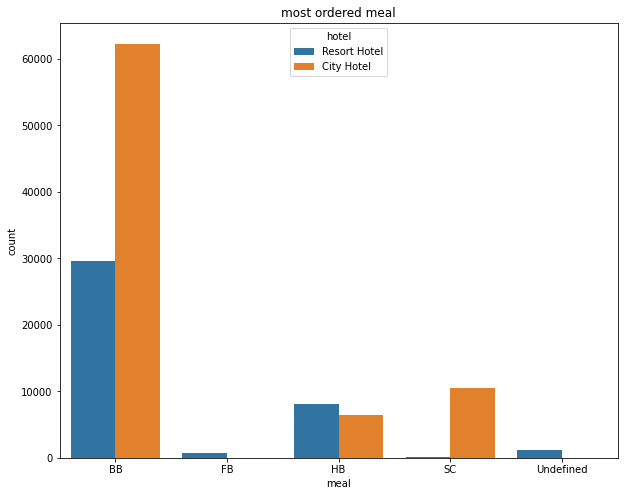

In [36]:
# Plotting a graph to see which is mostly ordered meal in which hotel
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='meal',data=hotel_booking_new,hue='hotel').set_title('most ordered meal')


## ***Q:4 How many booking were Cancelled?***

In [37]:
cancelled_booking=hotel_booking_new.groupby('hotel').is_canceled.value_counts()
cancelled_booking

hotel         is_canceled
City Hotel    0              46226
              1              33080
Resort Hotel  0              28519
              1              11077
Name: is_canceled, dtype: int64

In [38]:
cancelled_booking_percentange=hotel_booking_new.groupby('hotel').is_canceled.value_counts(normalize=True)
cancelled_booking_percentange

hotel         is_canceled
City Hotel    0              0.582881
              1              0.417119
Resort Hotel  0              0.720250
              1              0.279750
Name: is_canceled, dtype: float64

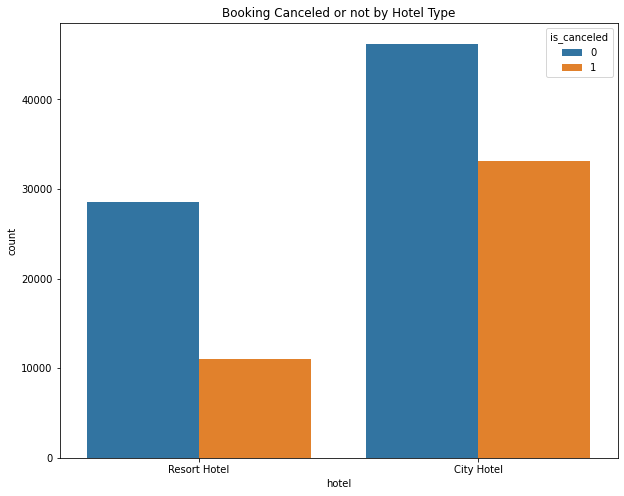

In [39]:
cancelled_booking=hotel_booking_new.groupby('hotel').is_canceled.value_counts()
plt.title("Booking Canceled or not by Hotel Type")
sns.countplot(x = "hotel", hue = 'is_canceled', data = hotel_booking_new)



### Inference : Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

## ***Q:5 Which are the most busy months?***

In [40]:
hotel_booking_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids'],
      dtype='object')

In [41]:
# Analysing which is busiest month for hotel booking.
hotel_booking_new.groupby('hotel')['arrival_date_month'].value_counts()


hotel         arrival_date_month
City Hotel    August                8983
              May                   8232
              July                  8088
              June                  7894
              October               7591
              April                 7476
              September             7400
              March                 6458
              February              4965
              November              4354
              December              4129
              January               3736
Resort Hotel  August                4873
              July                  4540
              April                 3569
              May                   3547
              October               3504
              March                 3281
              September             3067
              February              3047
              June                  3033
              December              2599
              November              2398
              January   

In [42]:
#Calculate the Percentage of busiest month.
hotel_booking_new.groupby('hotel')['arrival_date_month'].value_counts(normalize=True)

hotel         arrival_date_month
City Hotel    August                0.113270
              May                   0.103800
              July                  0.101985
              June                  0.099538
              October               0.095718
              April                 0.094268
              September             0.093309
              March                 0.081431
              February              0.062606
              November              0.054901
              December              0.052064
              January               0.047109
Resort Hotel  August                0.123068
              July                  0.114658
              April                 0.090135
              May                   0.089580
              October               0.088494
              March                 0.082862
              September             0.077457
              February              0.076952
              June                  0.076599
              December

### **August is the most occupied (busiest) month with 11.32% bookings  for City Hotel and 12.32% for Resort Hotel .On the otherhand January is the most unoccupied month with 4.71% bookings for City Hotel and 5.39% for Resort Hotel.**

Text(0.5, 1.0, 'Busiest month')

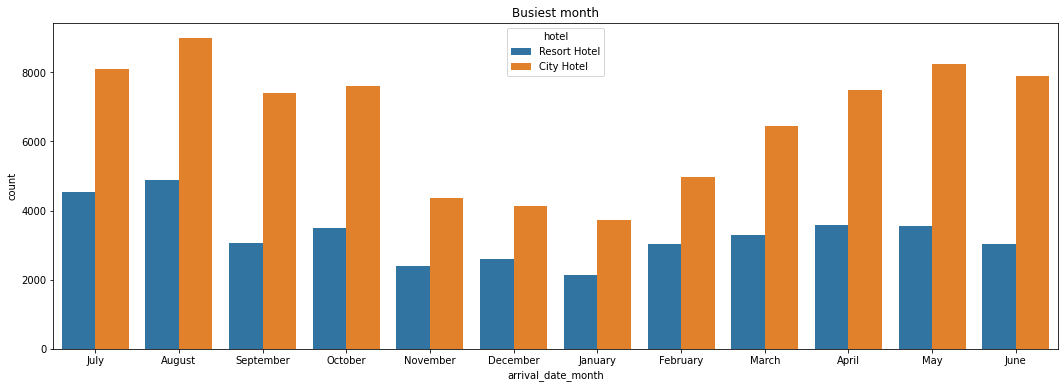

In [44]:
# Visulaising the graph for different month bookingn for both the hotel.
plt.figure(figsize=(18,6))
sns.countplot(x='arrival_date_month', hue='hotel', data= hotel_booking_new).set_title('Busiest month')

## ***Q:6 Which market segment have more number of booking ?***

In [45]:
hotel_booking_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids'],
      dtype='object')

In [46]:
a=hotel_booking_new.groupby('hotel')['market_segment'].value_counts()
a

hotel         market_segment
City Hotel    Online TA         38748
              Offline TA/TO     16733
              Groups            13974
              Direct             6092
              Corporate          2985
              Complementary       535
              Aviation            237
              Undefined             2
Resort Hotel  Online TA         17655
              Offline TA/TO      7427
              Direct             6357
              Groups             5832
              Corporate          2126
              Complementary       199
Name: market_segment, dtype: int64

In [47]:
hotel_booking_new.groupby('hotel')['market_segment'].value_counts(normalize=True)

hotel         market_segment
City Hotel    Online TA         0.488589
              Offline TA/TO     0.210993
              Groups            0.176204
              Direct            0.076816
              Corporate         0.037639
              Complementary     0.006746
              Aviation          0.002988
              Undefined         0.000025
Resort Hotel  Online TA         0.445878
              Offline TA/TO     0.187569
              Direct            0.160547
              Groups            0.147288
              Corporate         0.053692
              Complementary     0.005026
Name: market_segment, dtype: float64

**Around 48% of bookings are made via Online Travel Agents for City Hotel and 44% for Resort Hotel.On the otherhand approx 21% of bookings are made via Offline Travel Agents for City Hotel and 18% for Resort Hotel and less than 20% are Direct bookings without any other agents for both the hotels.**

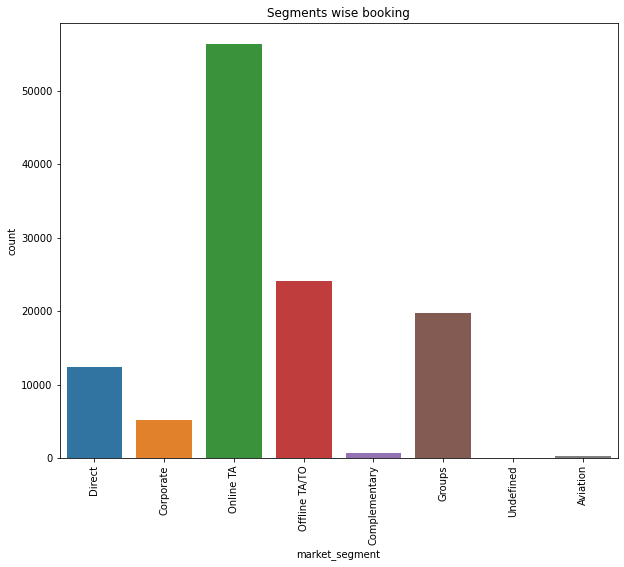

In [48]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = hotel_booking_new)
plt.xticks(rotation = 90)
plt.show()

## ***Q:7 What type of customer are mostly come in both the hotel ?***

In [49]:
hotel_booking_new[['hotel','customer_type']]

,hotel,customer_type
0,Resort Hotel,Transient
1,Resort Hotel,Transient
2,Resort Hotel,Transient
3,Resort Hotel,Transient
4,Resort Hotel,Transient
...,...,...
119385,City Hotel,Transient
119386,City Hotel,Transient
119387,City Hotel,Transient
119388,City Hotel,Transient


In [50]:
hotel_booking_new.groupby('hotel')['customer_type'].value_counts()


hotel         customer_type  
City Hotel    Transient          59382
              Transient-Party    17332
              Contract            2300
              Group                292
Resort Hotel  Transient          29792
              Transient-Party     7750
              Contract            1776
              Group                278
Name: customer_type, dtype: int64

In [51]:
hotel_booking_new.groupby('hotel')['customer_type'].value_counts(normalize=True)

hotel         customer_type  
City Hotel    Transient          0.748771
              Transient-Party    0.218546
              Contract           0.029002
              Group              0.003682
Resort Hotel  Transient          0.752399
              Transient-Party    0.195727
              Contract           0.044853
              Group              0.007021
Name: customer_type, dtype: float64

### **Transient type of customers are the more for both the hotel which is around 74% for City Hotel and 75% for Resort Hotel**


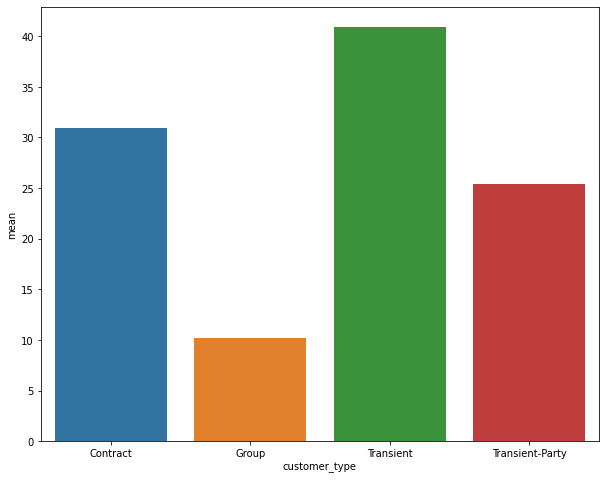

In [54]:
a = hotel_booking_new.groupby("customer_type")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)
plt.show()

In [55]:
hotel_booking_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids'],
      dtype='object')

## ***Q : 8 What is the booking percentage between Resort Hotel and City Hotel ?***

In [56]:
# Finding the number of booking in different hotel.
hotel_1=hotel_booking_new['hotel'].value_counts()
hotel_1

City Hotel      79306
Resort Hotel    39596
Name: hotel, dtype: int64

In [57]:
# finding the percentage of booking.
hotel_1_percentage=hotel_booking_new['hotel'].value_counts(normalize=True)
hotel_1_percentage

City Hotel      0.666986
Resort Hotel    0.333014
Name: hotel, dtype: float64

### **We can see that the booking percent of City hotel is  approx 66.70% which is more compared to Resort hotel that is 33.30 % .  This also conclude that Resort Hotel tend to be on the expensive side and most people will just stick with city hotel.**

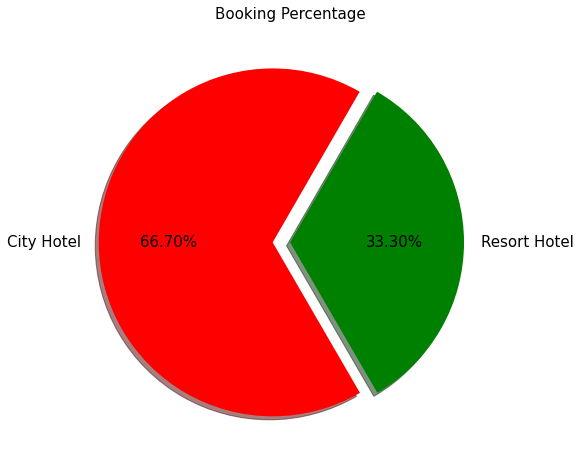

In [59]:
hotel_1=hotel_booking_new['hotel'].value_counts()

hotel_1.plot.pie(fontsize=15,autopct='%1.2f%%',figsize=(10,8),colors=['r','G'],ylabel='',explode=[0.10,0],shadow=True,startangle = 60)
plt.title('Booking Percentage',fontsize=15)
plt.show()

## ***9: What is the relationship between lead time and cancellation?***

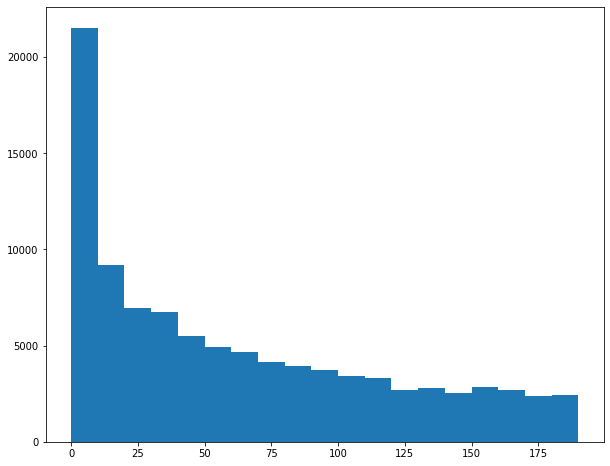

In [89]:
# Plot the hisogram to show the relationship between lead time and cancellation.
plt.hist (hotel_booking_new.lead_time, bins= np.arange(0,200,10))


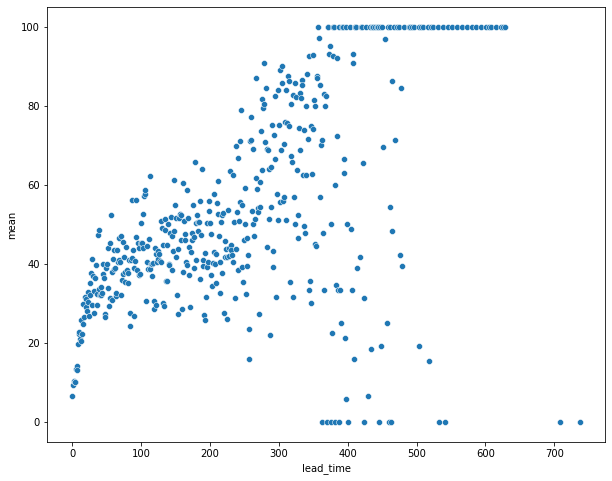

In [90]:
# plot the scatterplot to show  the relationship between lead time and cancellation. 
a = hotel_booking_new.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

## ***: Lead time has a positive correlation with cancellation.***

## ***Q: 10 What is the relationship between deposit type and cancellation?***

In [91]:
hotel_booking_new[hotel_booking_new.deposit_type== 'Refundable'].deposit_type.count()

162

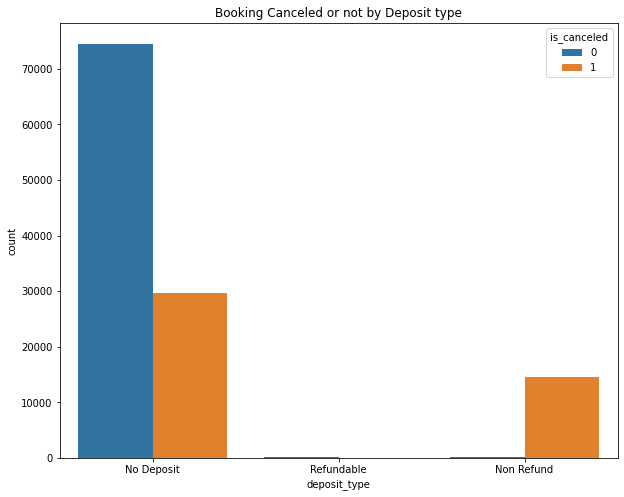

In [93]:
plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=hotel_booking_new,hue='is_canceled')


### ***So Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.***

## ***Q: 11 What is the relationship between market segment and cancellation?***

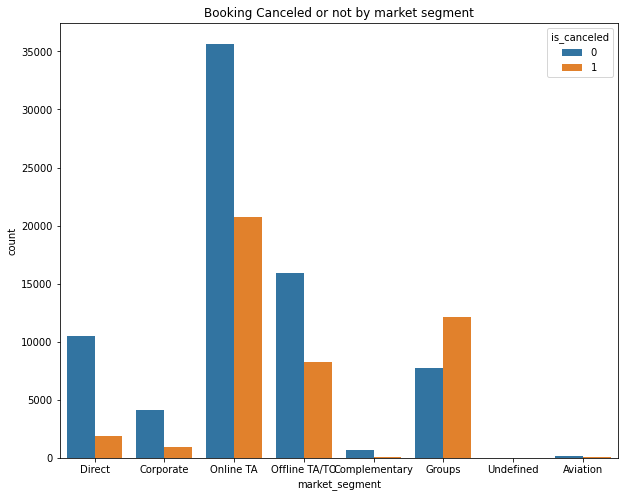

In [95]:
plt.title("Booking Canceled or not by market segment")
sns.countplot(x='market_segment',data=hotel_booking_new ,hue='is_canceled')

### ***Groups segment has cancellation rate around 50%. Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservations has high cancellation rate. It is interesting to note that direct segment has cancellation rate less than 20%.***

## ***Q: 12 What is the relationship between previous cancellations and cancellation ?***

In [96]:
hotel_booking_new[hotel_booking_new.previous_cancellations==1].count()

hotel                             6017
is_canceled                       6017
lead_time                         6017
arrival_date_year                 6017
arrival_date_month                6017
arrival_date_week_number          6017
arrival_date_day_of_month         6017
stays_in_weekend_nights           6017
stays_in_week_nights              6017
adults                            6017
meal                              6017
country                           6017
market_segment                    6017
distribution_channel              6017
is_repeated_guest                 6017
previous_cancellations            6017
previous_bookings_not_canceled    6017
reserved_room_type                6017
assigned_room_type                6017
booking_changes                   6017
deposit_type                      6017
days_in_waiting_list              6017
customer_type                     6017
adr                               6017
required_car_parking_spaces       6017
total_of_special_requests

In [97]:
hotel_booking_new.previous_cancellations.unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [98]:
hotel_booking_new.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,112455,112455,112455,112455,112455,112455,112455,112455,112455,112455,...,112455,112455,112455,112455,112455,112455,112455,112455,112455,112455
1,6017,6017,6017,6017,6017,6017,6017,6017,6017,6017,...,6017,6017,6017,6017,6017,6017,6017,6017,6017,6017
2,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
3,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
4,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
5,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
6,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
11,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
13,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


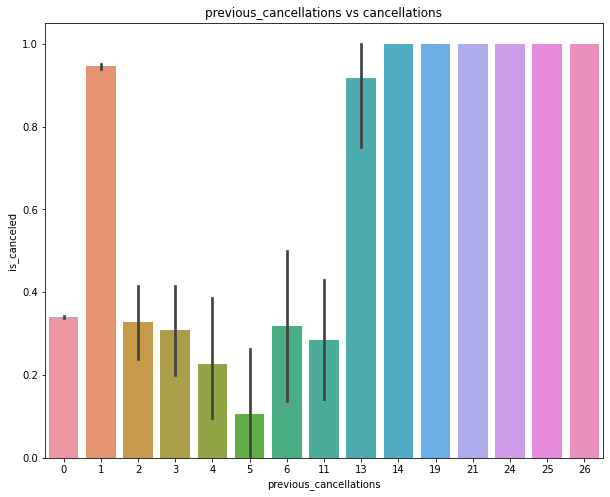

In [113]:
plt.title ('previous_cancellations vs cancellations')
sns.barplot(x= 'previous_cancellations' ,y = "is_canceled", data = hotel_booking_new)

### ***Those who have cancelled previously once have high chance of cancellation compared to 0 previous cancellations. For higher values of previous cancellations, numbers are very less and can be ignored.***